# Setup

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [78]:
df = pd.read_csv('heart.csv')
df.head(7)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,1,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0


# Data Preprocessing

In [79]:
df.shape

(50, 12)

In [80]:
print(df.isna().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [81]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,1,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [82]:
df['Gender'] = df['Sex'].map({'M': 1, 'F':0})
df['ExerciseAngina_Encoded'] = df['ExerciseAngina'].map({'Y': 1, 'N': 0})
df['ST_Slope_Encoded'] = df['ST_Slope'].map({'Up': 1, 'Flat': 0})
df['RestingECG_Encoded'] = df['RestingECG'].map({'Normal': 0, 'ST': 1})
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Gender,ExerciseAngina_Encoded,ST_Slope_Encoded,RestingECG_Encoded
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1,0,1,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0,0,0,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,1,0,1,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0,1,0,0
4,54,M,NAP,150,195,1,Normal,122,N,0.0,Up,0,1,0,1,0


In [83]:
cols = list(df.columns)

cols.remove('Gender')
sex_idx = cols.index('Sex')
cols.insert(sex_idx + 1, 'Gender')

cols.remove('ExerciseAngina_Encoded')
ExerciseAngina_idx = cols.index('ExerciseAngina')
cols.insert(ExerciseAngina_idx + 1, 'ExerciseAngina_Encoded')

cols.remove('ST_Slope_Encoded')
ST_Slope_idx = cols.index('ST_Slope')
cols.insert(ST_Slope_idx + 1, 'ST_Slope_Encoded')

cols.remove('RestingECG_Encoded')
RestingECG_idx = cols.index('RestingECG')
cols.insert(RestingECG_idx + 1, 'RestingECG_Encoded')

df = df[cols]

df.head()

,Age,Sex,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,RestingECG_Encoded,MaxHR,ExerciseAngina,ExerciseAngina_Encoded,Oldpeak,ST_Slope,ST_Slope_Encoded,HeartDisease
0,40,M,1,ATA,140,289,0,Normal,0,172,N,0,0.0,Up,1,0
1,49,F,0,NAP,160,180,0,Normal,0,156,N,0,1.0,Flat,0,1
2,37,M,1,ATA,130,283,0,ST,1,98,N,0,0.0,Up,1,0
3,48,F,0,ASY,138,214,0,Normal,0,108,Y,1,1.5,Flat,0,1
4,54,M,1,NAP,150,195,1,Normal,0,122,N,0,0.0,Up,1,0


In [84]:
df.shape


(50, 16)

In [85]:
df.dtypes

Age                         int64
Sex                        object
Gender                      int64
ChestPainType              object
RestingBP                   int64
Cholesterol                 int64
FastingBS                   int64
RestingECG                 object
RestingECG_Encoded          int64
MaxHR                       int64
ExerciseAngina             object
ExerciseAngina_Encoded      int64
Oldpeak                   float64
ST_Slope                   object
ST_Slope_Encoded            int64
HeartDisease                int64
dtype: object

In [86]:
df.describe()

,Age,Gender,RestingBP,Cholesterol,FastingBS,RestingECG_Encoded,MaxHR,ExerciseAngina_Encoded,Oldpeak,ST_Slope_Encoded,HeartDisease
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,46.280000,0.660000,128.240000,245.080000,0.120000,0.200000,140.900000,0.220000,0.580000,0.560000,0.320000
std,7.777624,0.478518,13.964328,68.487401,0.328261,0.404061,23.602361,0.418452,0.894199,0.501427,0.471212
min,32.000000,0.000000,100.000000,164.000000,0.000000,0.000000,87.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,0.000000,120.000000,201.750000,0.000000,0.000000,122.750000,0.000000,0.000000,0.000000,0.000000
50%,46.500000,1.000000,127.500000,225.500000,0.000000,0.000000,142.000000,0.000000,0.000000,1.000000,0.000000
75%,53.000000,1.000000,140.000000,280.500000,0.000000,0.000000,163.000000,0.000000,1.000000,1.000000,1.000000
max,65.000000,1.000000,160.000000,518.000000,1.000000,1.000000,184.000000,1.000000,3.000000,1.000000,1.000000


In [87]:
# Summary statistics for categorical variables
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
print("Distribution of categorical variables:")

for col in categorical_columns:
    print(f"\n{col} Distribution:")
    print(df[col].value_counts())
    print(f"{col} Percentage:")
    print(df[col].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

Distribution of categorical variables:

Sex Distribution:
Sex
M    33
F    17
Name: count, dtype: int64
Sex Percentage:
Sex
M    66.0%
F    34.0%
Name: proportion, dtype: object

ChestPainType Distribution:
ChestPainType
ATA    23
NAP    13
ASY    13
TA      1
Name: count, dtype: int64
ChestPainType Percentage:
ChestPainType
ATA    46.0%
NAP    26.0%
ASY    26.0%
TA      2.0%
Name: proportion, dtype: object

RestingECG Distribution:
RestingECG
Normal    40
ST        10
Name: count, dtype: int64
RestingECG Percentage:
RestingECG
Normal    80.0%
ST        20.0%
Name: proportion, dtype: object

ExerciseAngina Distribution:
ExerciseAngina
N    39
Y    11
Name: count, dtype: int64
ExerciseAngina Percentage:
ExerciseAngina
N    78.0%
Y    22.0%
Name: proportion, dtype: object

ST_Slope Distribution:
ST_Slope
Up      28
Flat    22
Name: count, dtype: int64
ST_Slope Percentage:
ST_Slope
Up      56.0%
Flat    44.0%
Name: proportion, dtype: object

HeartDisease Distribution:
HeartDisease
0    34

In [88]:
true_numeric = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
binary_encoded = ['Gender', 'ExerciseAngina_Encoded', 'FastingBS', 'ST_Slope_Encoded', 'RestingECG_Encoded', 'HeartDisease']

df.head()

,Age,Sex,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,RestingECG_Encoded,MaxHR,ExerciseAngina,ExerciseAngina_Encoded,Oldpeak,ST_Slope,ST_Slope_Encoded,HeartDisease
0,40,M,1,ATA,140,289,0,Normal,0,172,N,0,0.0,Up,1,0
1,49,F,0,NAP,160,180,0,Normal,0,156,N,0,1.0,Flat,0,1
2,37,M,1,ATA,130,283,0,ST,1,98,N,0,0.0,Up,1,0
3,48,F,0,ASY,138,214,0,Normal,0,108,Y,1,1.5,Flat,0,1
4,54,M,1,NAP,150,195,1,Normal,0,122,N,0,0.0,Up,1,0


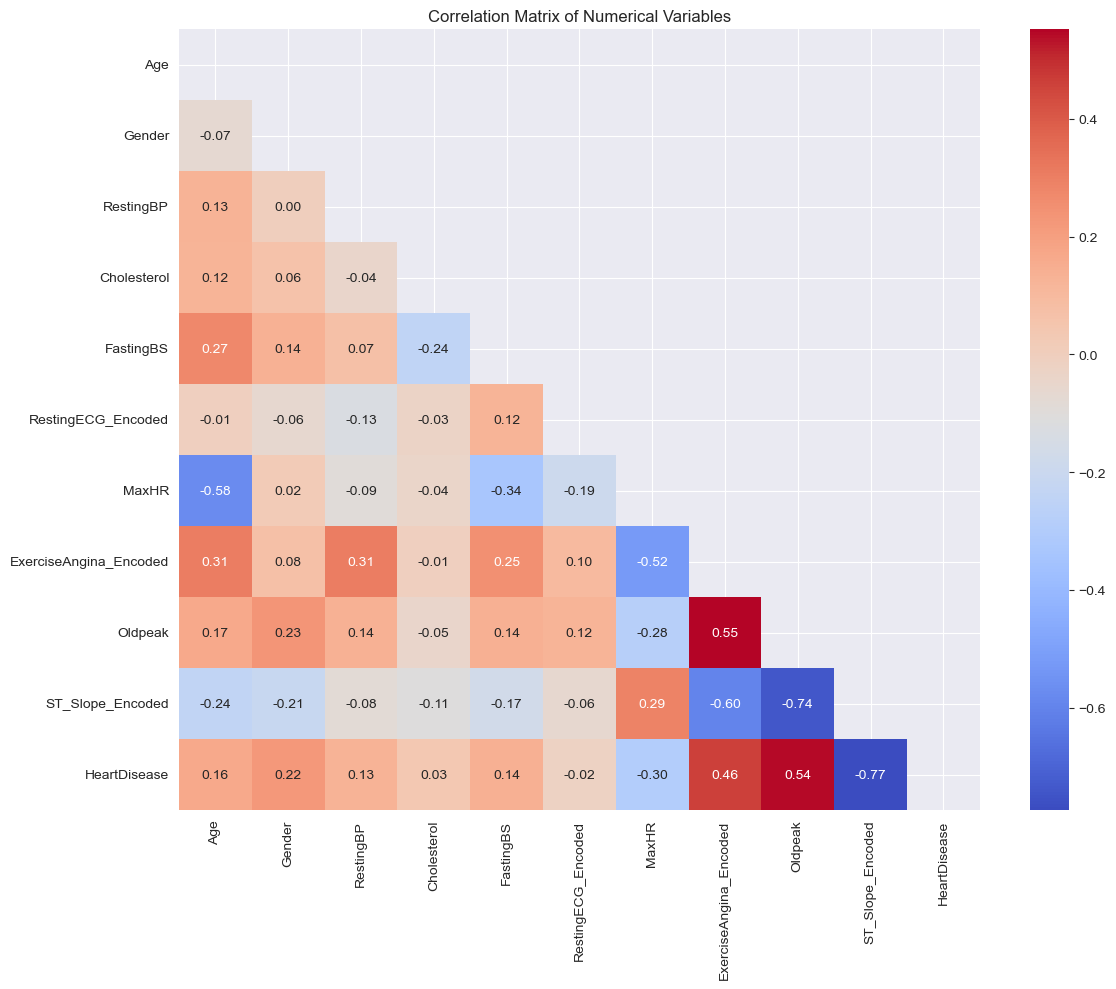

In [89]:
# Correlation analysis for numerical variables
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 10))
correlation = numeric_df.corr()
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', mask=mask)
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

# Exploratory Data Analysis (EDA)

## Univariate Analysis

In [90]:
print(df[true_numeric].describe())

             Age   RestingBP  Cholesterol       MaxHR    Oldpeak
count  50.000000   50.000000    50.000000   50.000000  50.000000
mean   46.280000  128.240000   245.080000  140.900000   0.580000
std     7.777624   13.964328    68.487401   23.602361   0.894199
min    32.000000  100.000000   164.000000   87.000000   0.000000
25%    40.000000  120.000000   201.750000  122.750000   0.000000
50%    46.500000  127.500000   225.500000  142.000000   0.000000
75%    53.000000  140.000000   280.500000  163.000000   1.000000
max    65.000000  160.000000   518.000000  184.000000   3.000000


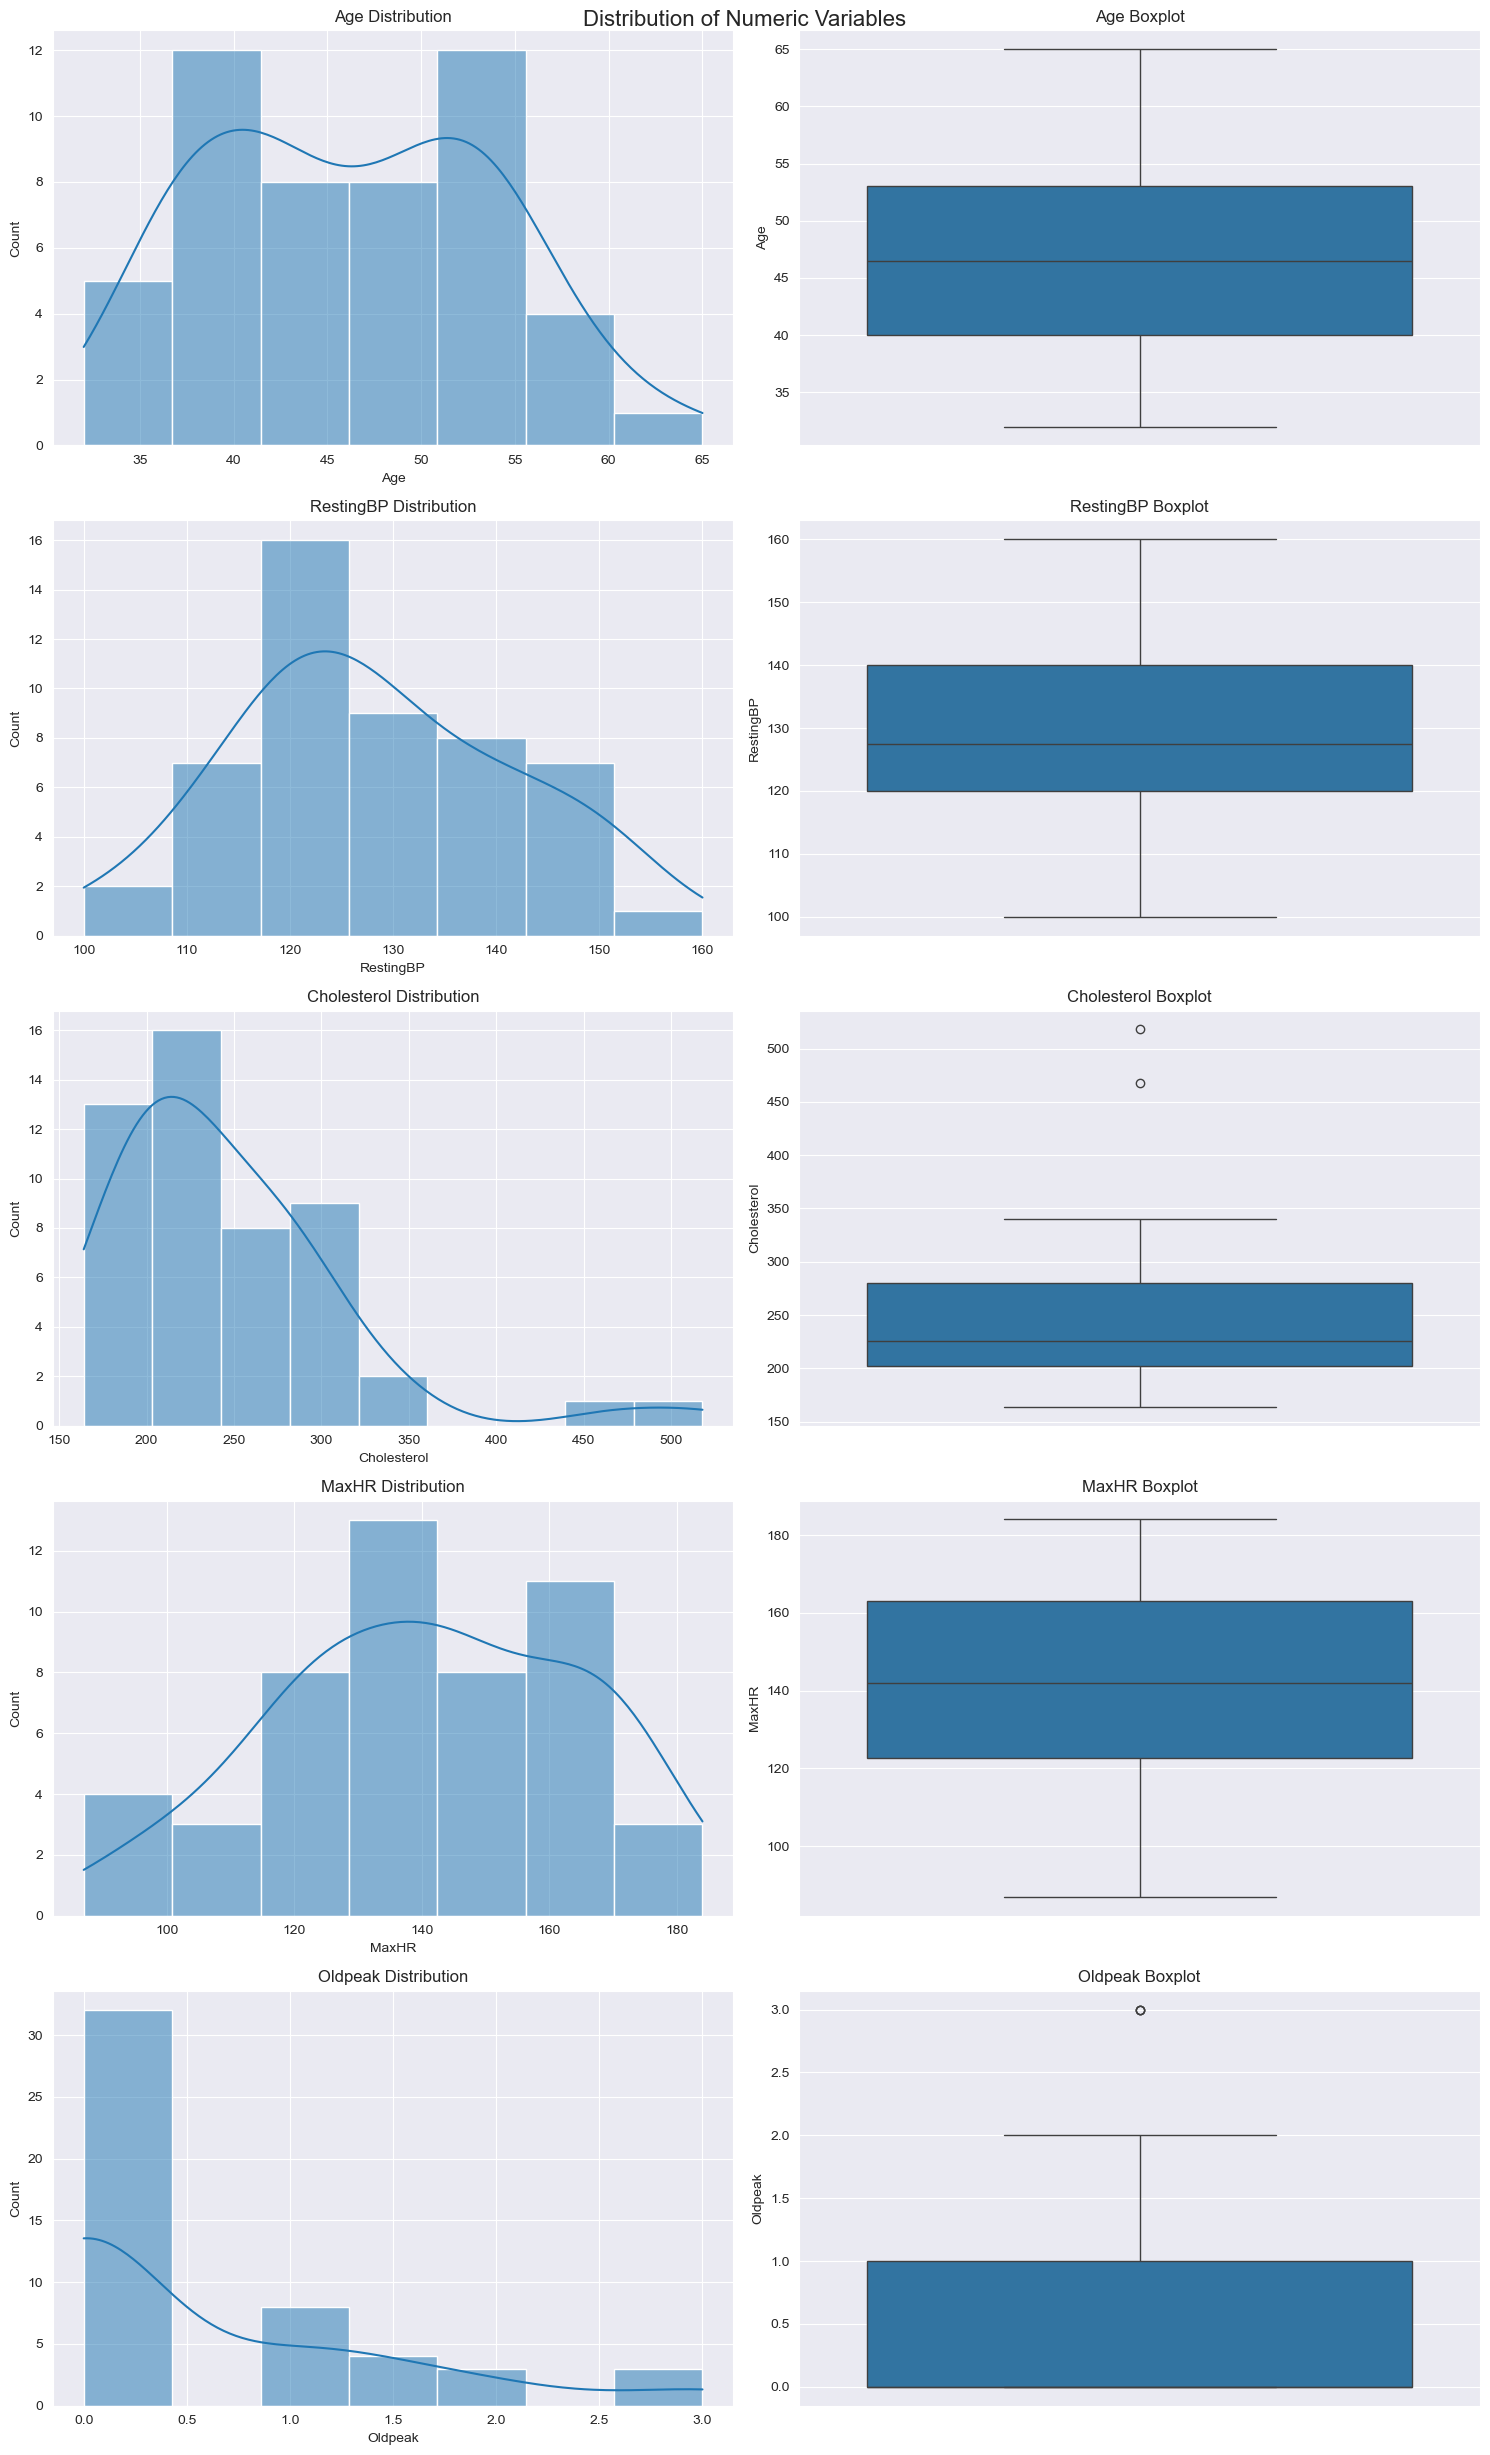

In [91]:
fig, axes = plt.subplots(len(true_numeric), 2, figsize=(15, 5 * len(true_numeric)))
fig.suptitle('Distribution of Numeric Variables', fontsize=16)

for i, col in enumerate(true_numeric):
    # Histogram
    sns.histplot(data=df, x=col, ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'{col} Distribution')

    # Boxplot
    sns.boxplot(data=df, y=col, ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} Boxplot')

plt.tight_layout()
plt.show()


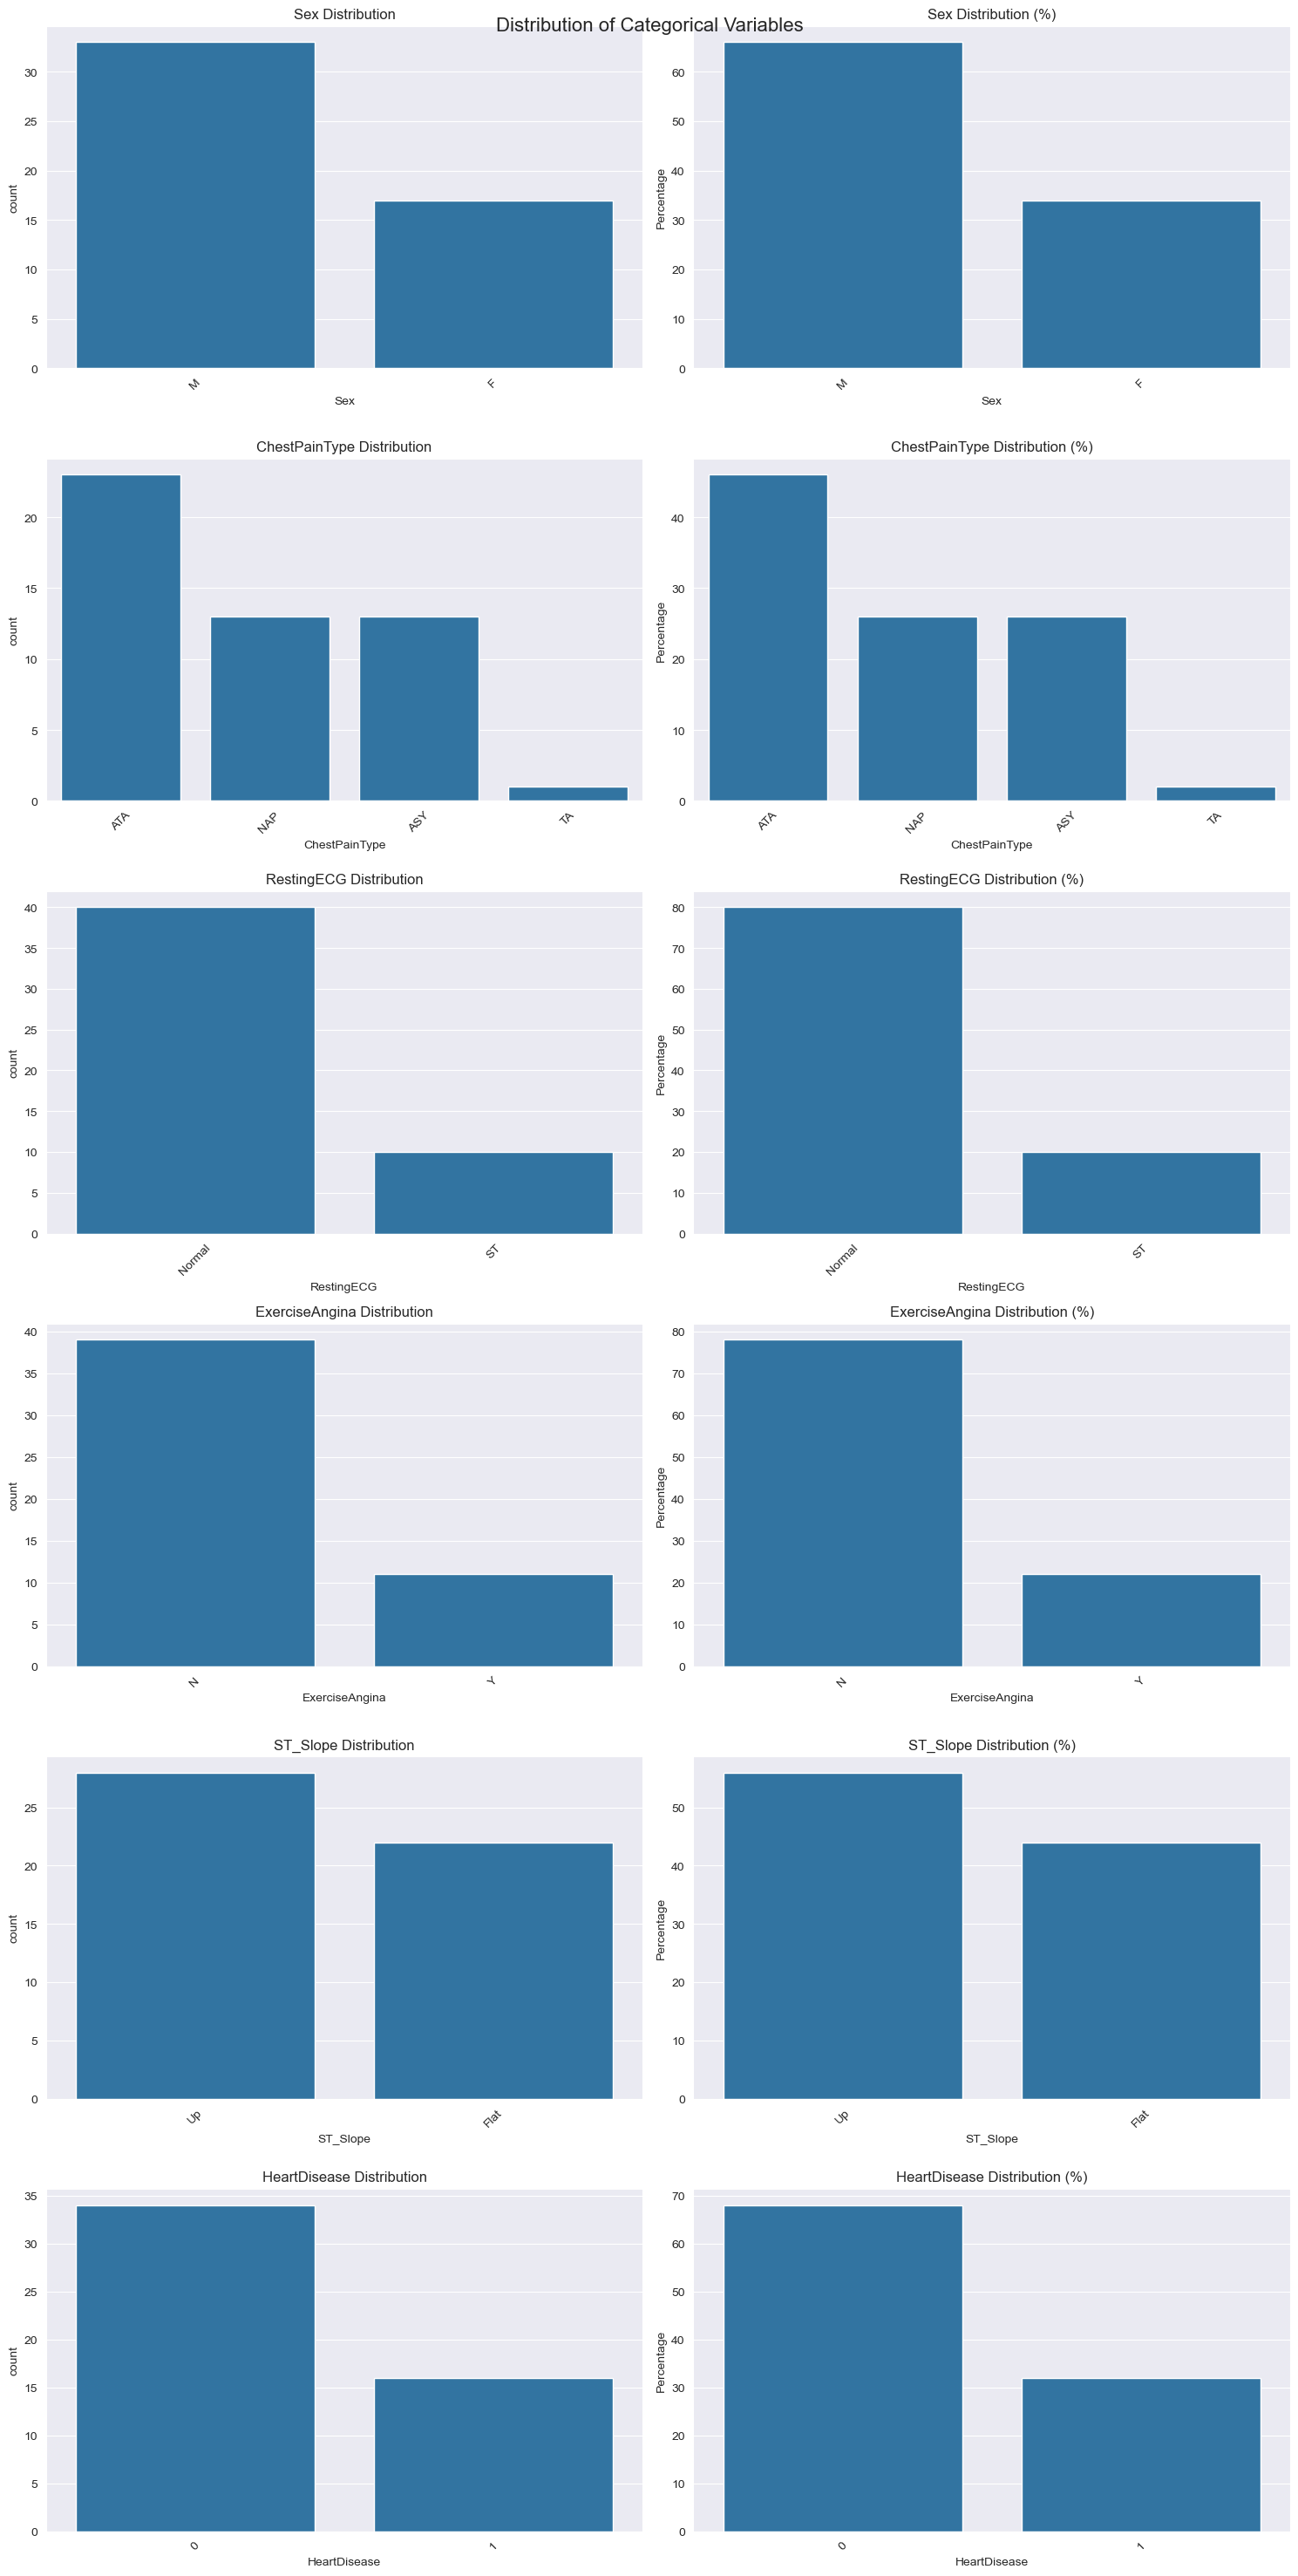

In [92]:
fig, axes = plt.subplots(len(categorical_columns), 2, figsize=(15, 5 * len(categorical_columns)))
fig.suptitle('Distribution of Categorical Variables', fontsize=16)

for i, col in enumerate(categorical_columns):
    # Count plot
    sns.countplot(data=df, x=col, ax=axes[i, 0])
    axes[i, 0].set_title(f'{col} Distribution')
    axes[i, 0].tick_params(axis='x', rotation=45)

    # Percentage plot
    percentages = df[col].value_counts(normalize=True) * 100
    sns.barplot(x=percentages.index, y=percentages.values, ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} Distribution (%)')
    axes[i, 1].set_ylabel('Percentage')
    axes[i, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## Bivariate Analysis

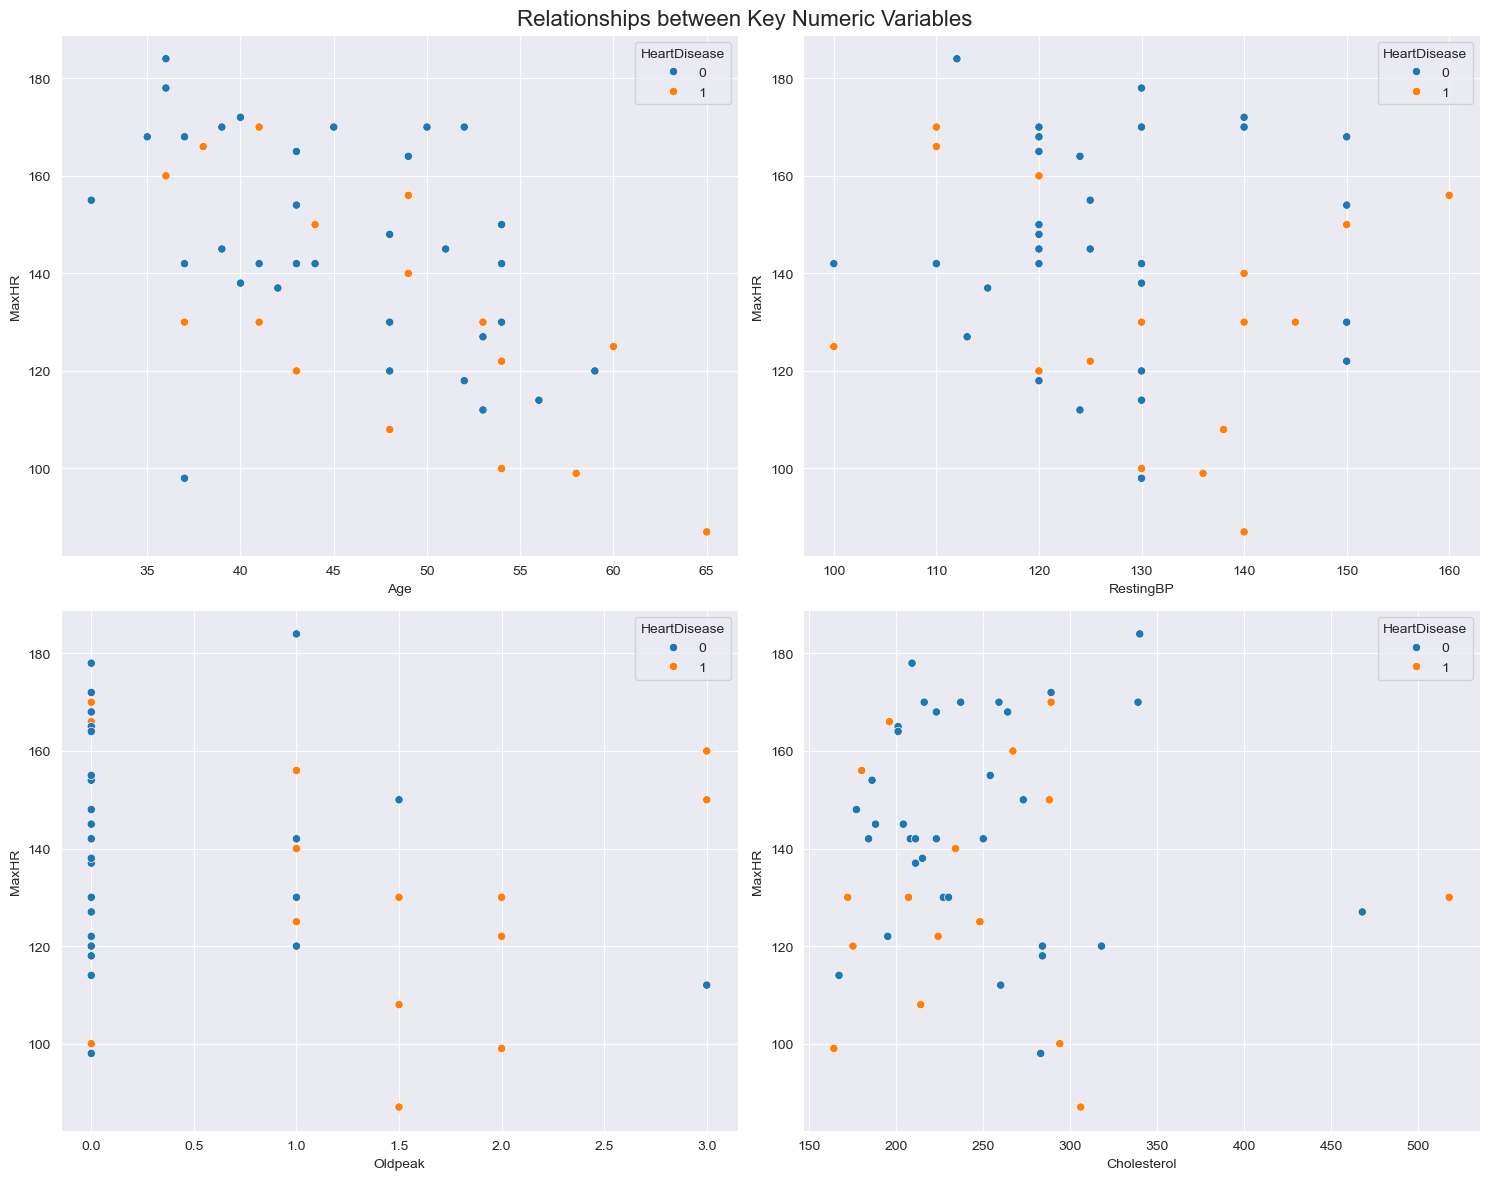

In [93]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Relationships between Key Numeric Variables', fontsize=16)

sns.scatterplot(data=df, x='Age', y='MaxHR', hue='HeartDisease', ax=axes[0, 0])
sns.scatterplot(data=df, x='RestingBP', y='MaxHR', hue='HeartDisease', ax=axes[0, 1])
sns.scatterplot(data=df, x='Oldpeak', y='MaxHR', hue='HeartDisease', ax=axes[1, 0])
sns.scatterplot(data=df, x='Cholesterol', y='MaxHR', hue='HeartDisease', ax=axes[1, 1])

plt.tight_layout()

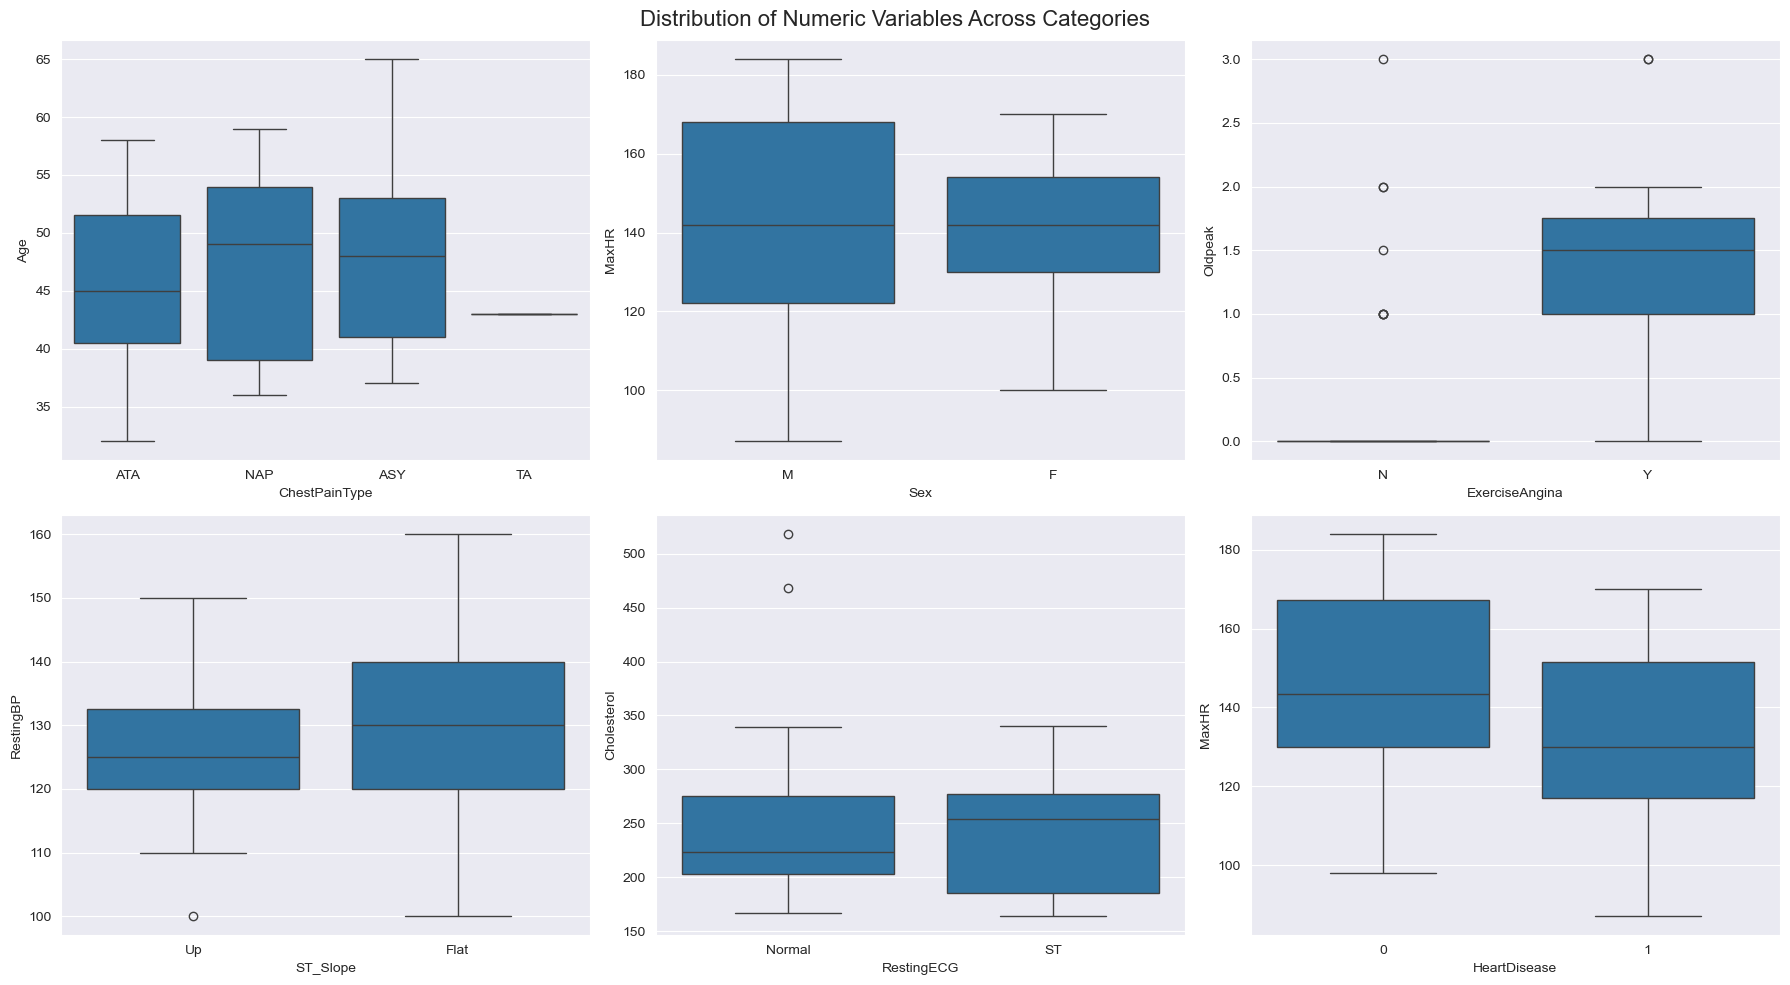

In [94]:
# Numeric vs Categorical Analysis - Box plots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribution of Numeric Variables Across Categories', fontsize=16)

sns.boxplot(data=df, x='ChestPainType', y='Age', ax=axes[0, 0])
sns.boxplot(data=df, x='Sex', y='MaxHR', ax=axes[0, 1])
sns.boxplot(data=df, x='ExerciseAngina', y='Oldpeak', ax=axes[0, 2])
sns.boxplot(data=df, x='ST_Slope', y='RestingBP', ax=axes[1, 0])
sns.boxplot(data=df, x='RestingECG', y='Cholesterol', ax=axes[1, 1])
sns.boxplot(data=df, x='HeartDisease', y='MaxHR', ax=axes[1, 2])

plt.tight_layout()

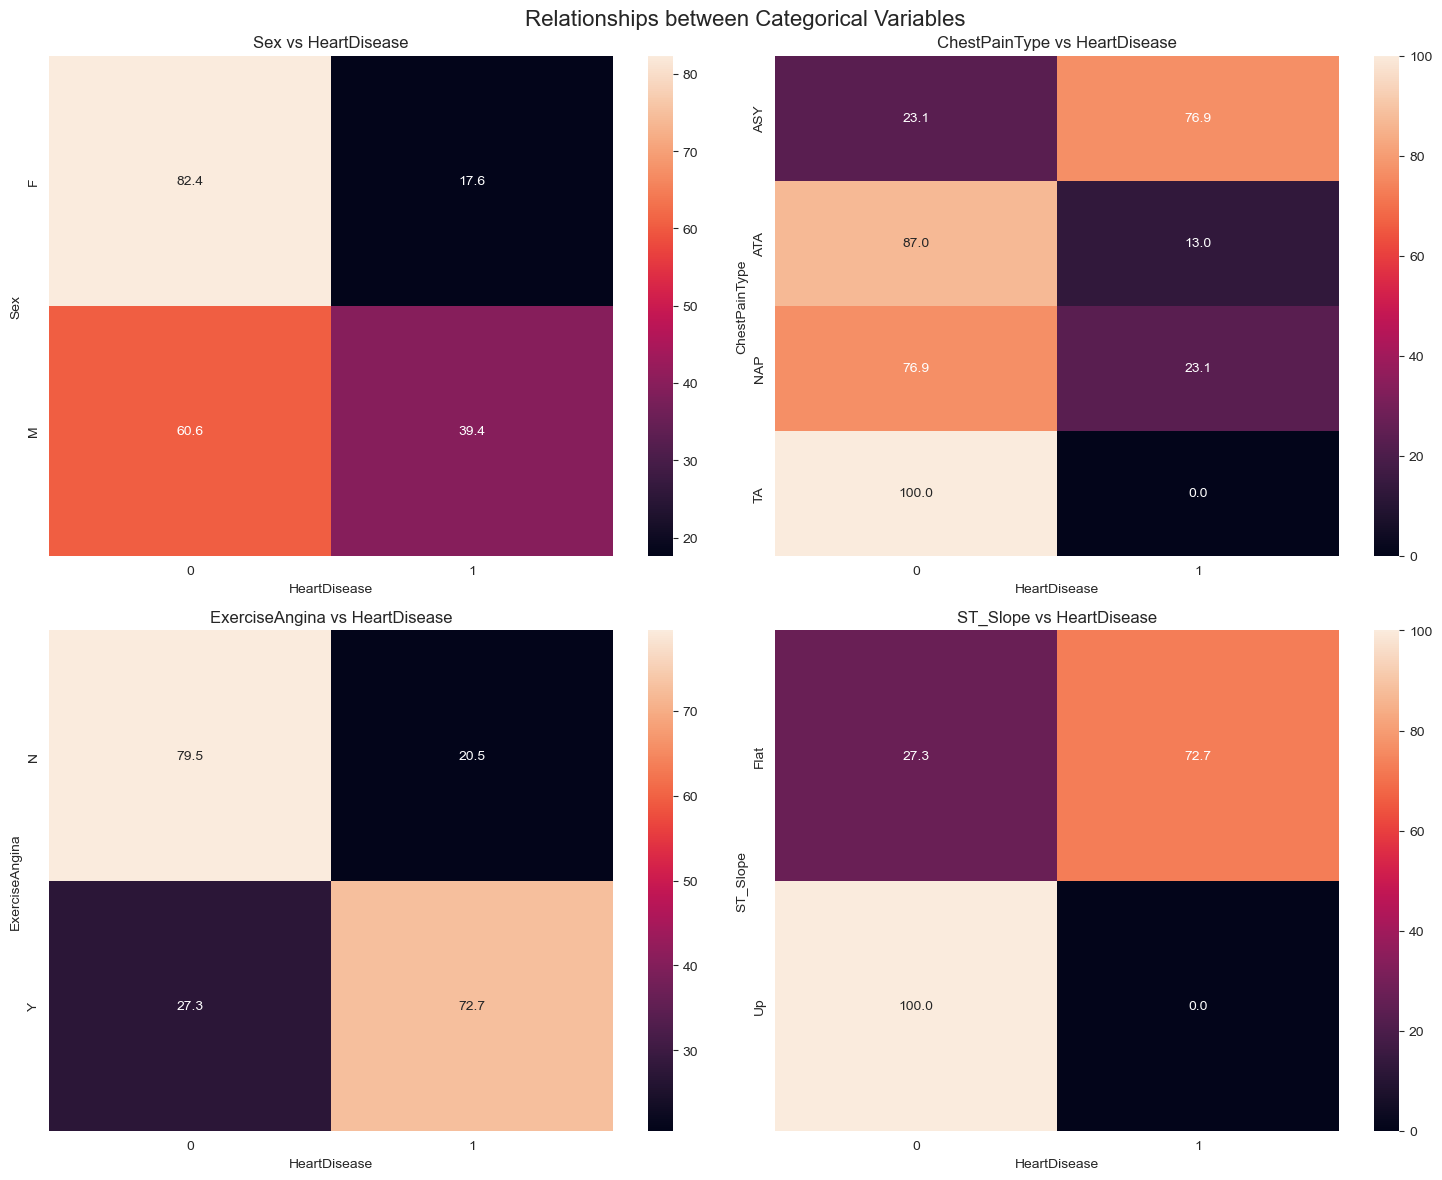

In [95]:
cat_pairs = [
    ('Sex', 'HeartDisease'),
    ('ChestPainType', 'HeartDisease'),
    ('ExerciseAngina', 'HeartDisease'),
    ('ST_Slope', 'HeartDisease')
]

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Relationships between Categorical Variables', fontsize=16)

for i, (var1, var2) in enumerate(cat_pairs):
    ct = pd.crosstab(df[var1], df[var2], normalize='index') * 100
    sns.heatmap(ct, annot=True, fmt='.1f', ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'{var1} vs {var2}')

plt.tight_layout()


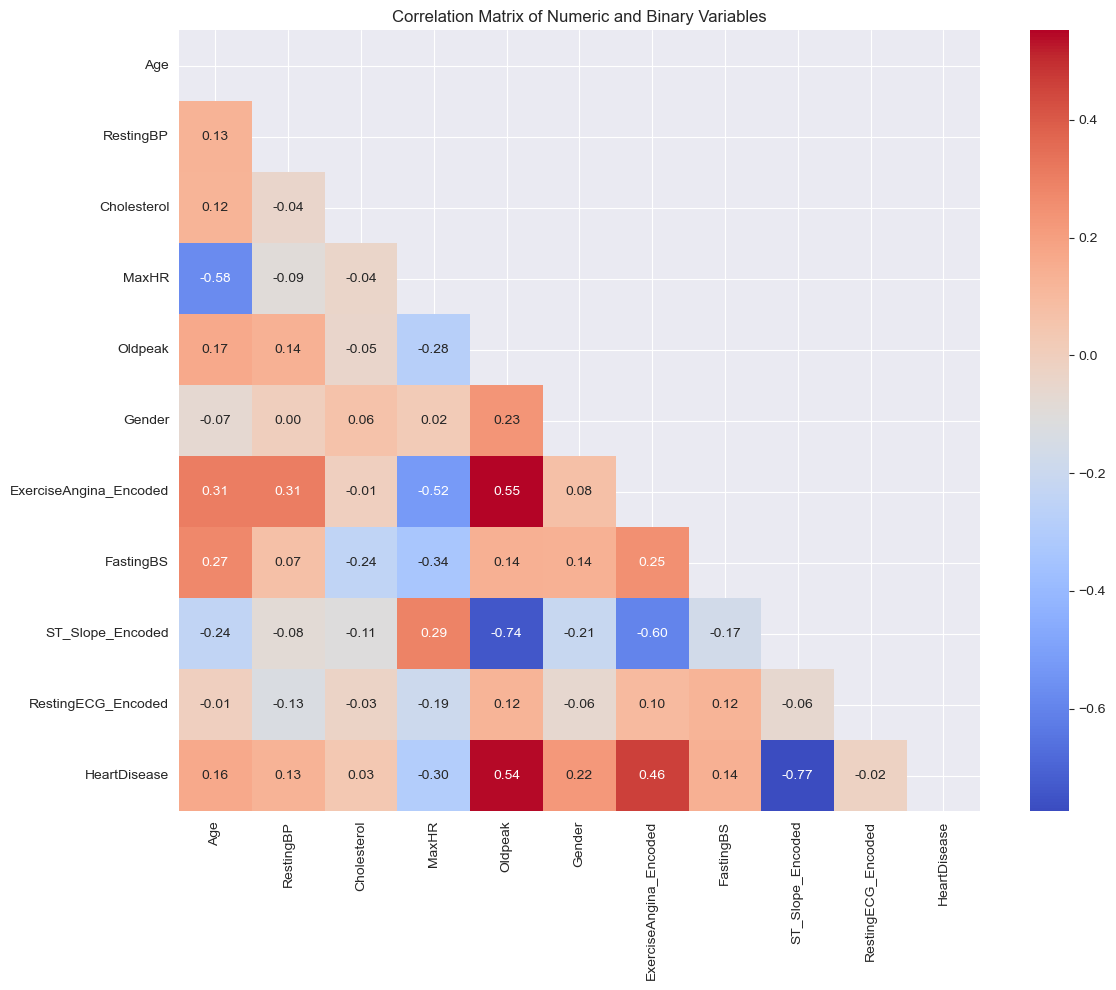

In [96]:
# Correlation matrix visualization
plt.figure(figsize=(12, 10))
correlation = df[true_numeric + binary_encoded].corr()
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', mask=mask)
plt.title('Correlation Matrix of Numeric and Binary Variables')
plt.tight_layout()
plt.show()

In [97]:
# Display numerical correlation values
pd.DataFrame(correlation).round(3)


,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Gender,ExerciseAngina_Encoded,FastingBS,ST_Slope_Encoded,RestingECG_Encoded,HeartDisease
Age,1.000,0.128,0.122,-0.575,0.167,-0.067,0.307,0.274,-0.240,-0.005,0.164
RestingBP,0.128,1.000,-0.045,-0.093,0.137,0.000,0.305,0.074,-0.084,-0.128,0.131
Cholesterol,0.122,-0.045,1.000,-0.039,-0.045,0.062,-0.006,-0.245,-0.111,-0.030,0.035
MaxHR,-0.575,-0.093,-0.039,1.000,-0.279,0.019,-0.525,-0.336,0.291,-0.190,-0.296
Oldpeak,0.167,0.137,-0.045,-0.279,1.000,0.232,0.552,0.140,-0.739,0.124,0.543
Gender,-0.067,0.000,0.062,0.019,0.232,1.000,0.075,0.135,-0.211,-0.063,0.221
ExerciseAngina_Encoded,0.307,0.305,-0.006,-0.525,0.552,0.075,1.000,0.250,-0.599,0.097,0.464
FastingBS,0.274,0.074,-0.245,-0.336,0.140,0.135,0.250,1.000,-0.169,0.123,0.142
ST_Slope_Encoded,-0.240,-0.084,-0.111,0.291,-0.739,-0.211,-0.599,-0.169,1.000,-0.060,-0.774
RestingECG_Encoded,-0.005,-0.128,-0.030,-0.190,0.124,-0.063,0.097,0.123,-0.060,1.000,-0.021


## Geographical Distribution of Heart Disease Variables

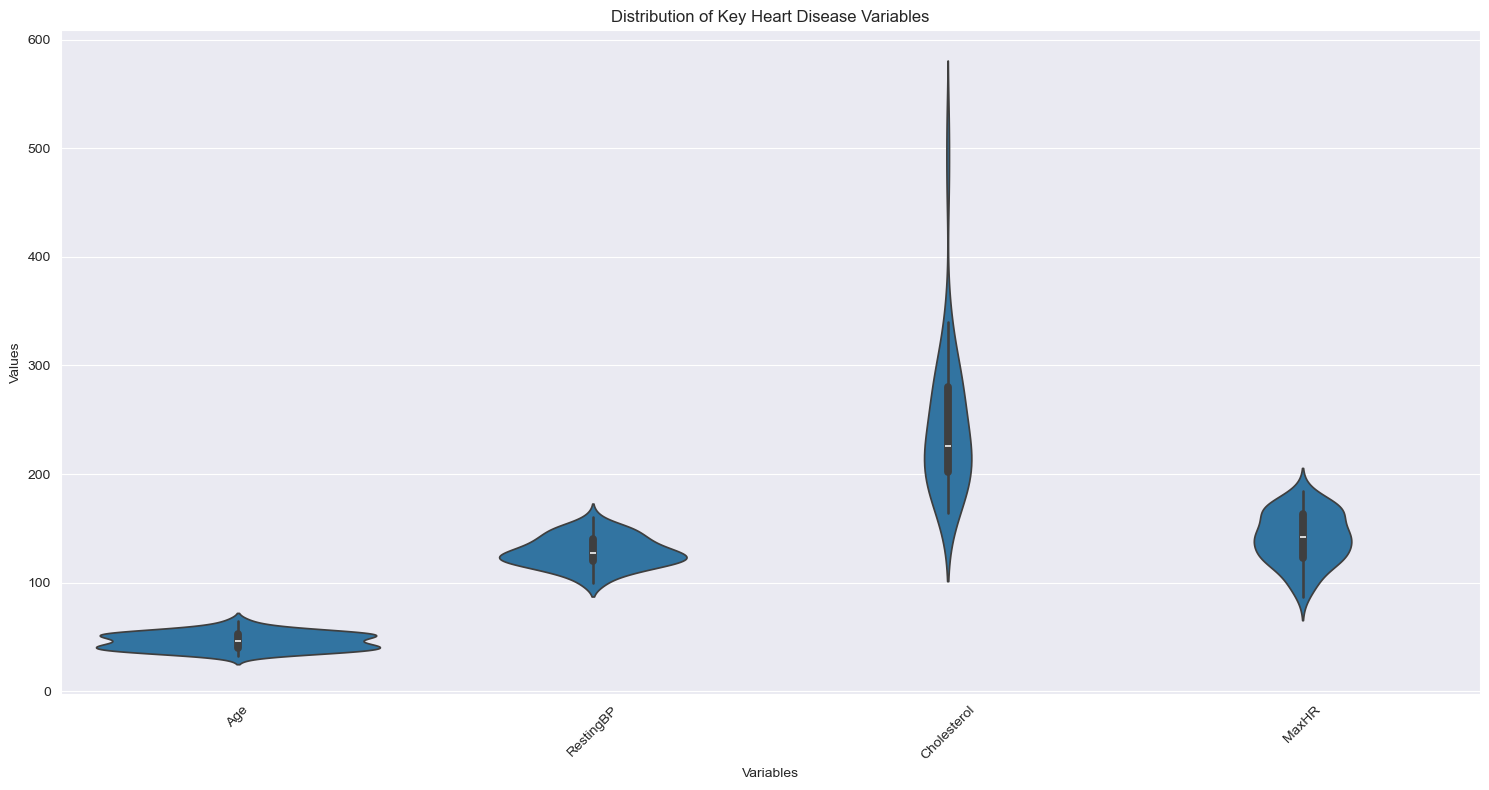

In [98]:
plt.figure(figsize=(15, 8))
variables_to_plot = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR']

# Create violin plot
sns.violinplot(data=pd.melt(df[variables_to_plot]), x='variable', y='value')

plt.title('Distribution of Key Heart Disease Variables')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x1000 with 0 Axes>

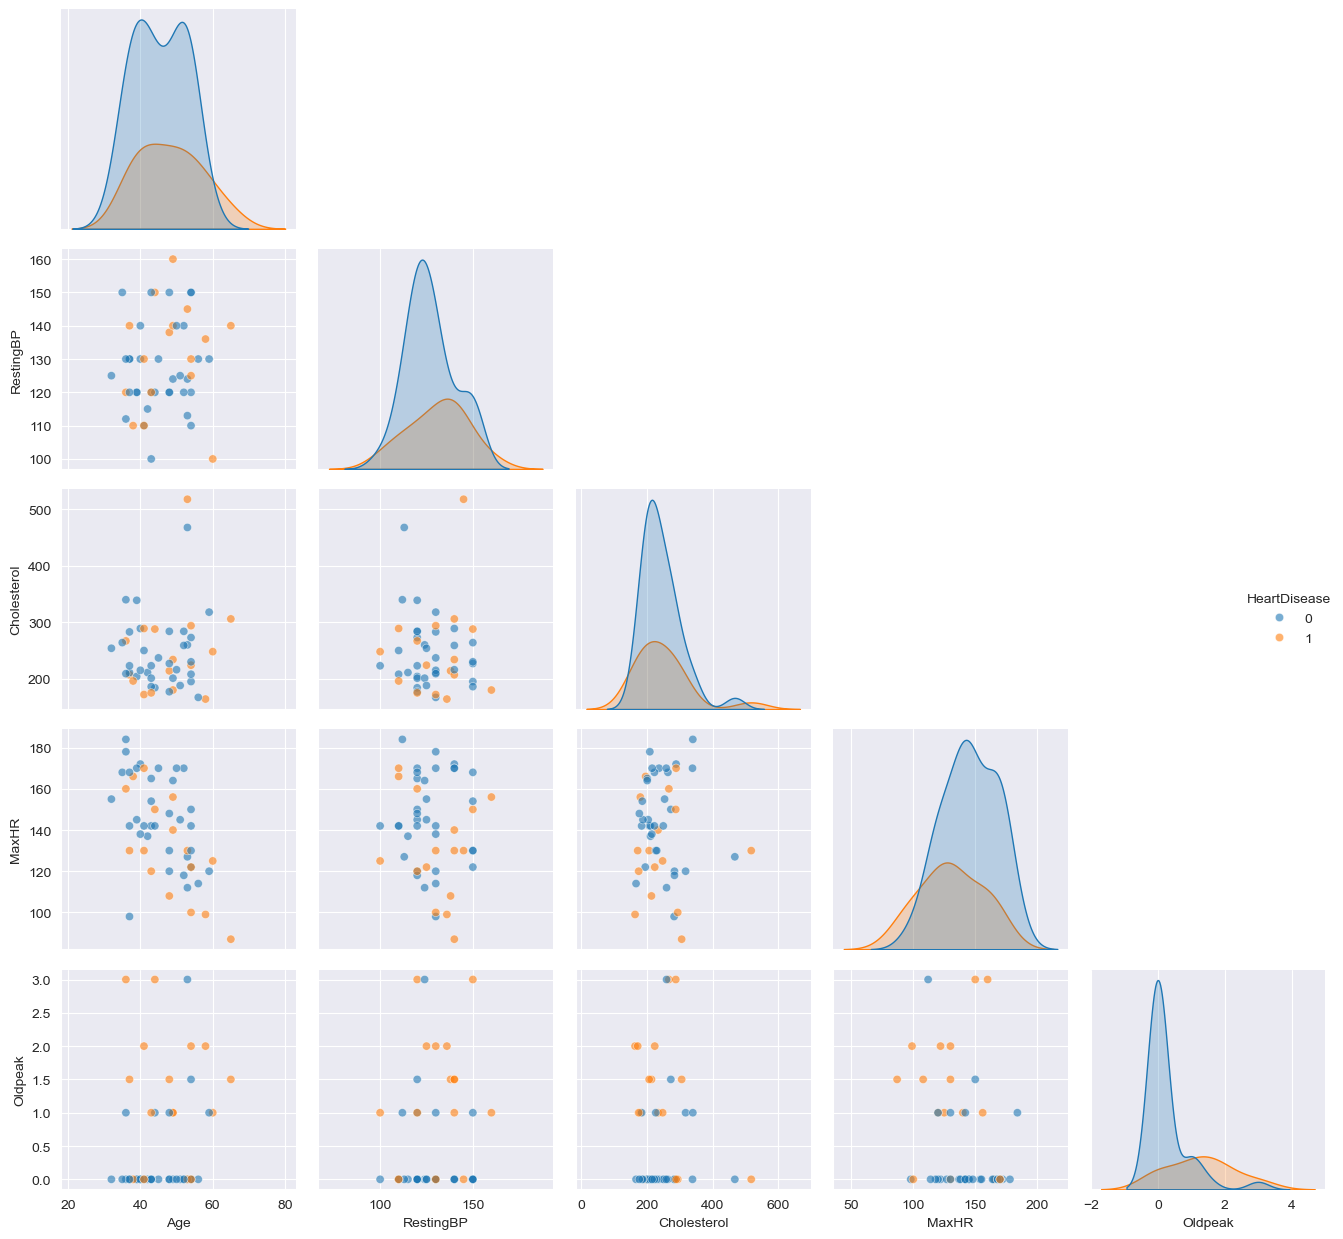

In [99]:
plt.figure(figsize=(12, 10))
sns.pairplot(data=df,
             vars=['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'],
             hue='HeartDisease',
             diag_kind='kde',
             plot_kws={'alpha': 0.6},
             corner=True)
plt.tight_layout()
plt.show()
